# Статистика

## Основные понятия
### Среднее арифметическое
Сумма всех чисел, деленное на их количество 		

![images/mean.png](images/mean.png)
## Медиана
Рассчитывается в два шага:
Отсортировывается массив по возрастанию. 
Медианой считается число, стоящие посередине получившегося массива
(В случае, если число элементов четное, то медианой считается 
среднее арифметическое между двумя центральными числами)
## Мода
Самое часто встречаемое число в массиве
## Стандартное отклонение 
На сколько данные отклоняются от среднего значения.



# Основные импорты

In [1]:
import numpy as np
from typing import List
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import norm
import math
import seaborn as sns

# Задание

In [3]:
def user_mean(a: List):
    N = len(a)
    return sum(a) / N

def user_median(a:List):
    N = len(a)
    a_sorted = sorted(a)
    median_index = N // 2 - 1
    # специально прописал не обязательное условие для понимания, 
    # что это случай нечетных чисел
    if N % 2 == 1:
        return a_sorted[median_index]
    else:
        return (a_sorted[median_index] + a_sorted[median_index + 1]) / 2
    
def user_mode(a):
    # your code
    

def user_std(a):
    # your code
    pass

In [8]:
## Тест
a = np.random.randint(1, 100, 20)
print(f'Среднее значение = {user_mean(a)}')
assert user_mean(a) == np.mean(a)
print(f'Медиана = {user_median(a)}')
assert user_median(a) == np.median(a)
print(f'Мода = {user_mode(a)}')
assert user_mode(a) == stats.mode(a, keepdims=True).mode[0]
print(f'Стандартное отклонение равно = {user_std(a)}')
assert user_std(a) == np.std(a)

Среднее значение = 40.55
Медиана = 39.5
Мода = None
Стандартное отклонение равно = None


# Распределения случайных велечин

## Равномерное распределение
Параметры: a, b - концы отрезка.

Плотность распределения:
$$
p(x) =
 \begin{cases}
   \frac{1}{b-a} & x \in [a,b]\\
   0 & x \notin [a,b]\\
 \end{cases}
$$

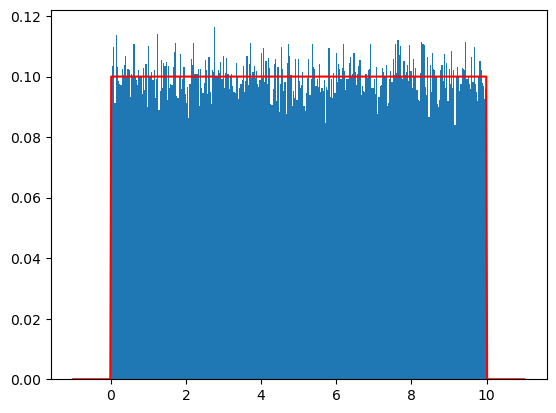

In [34]:
def uniform_density(x, a , b):
    if a <= x <= b:
        return 1/(b-a)
    else:
        return 0

a = 0
b = 10
n = 100000

# метод, позволяющий создать массив чисел из равномерного распределения. 
Z = np.random.uniform(a, b, n)
plt.figure()
plt.hist(Z, density=True, bins=int(n**0.5));

X = np.linspace(a-1,b+1,num=500)
Y = [uniform_density(x, a, b) for x in X]
plt.plot(X,Y,color='r')

## Нормальное (гауссово) распределение
Параметры: $\mu$ - математическое ожидание, $\sigma$ - стандартное отклонение
$$
N(x,\mu,\sigma) = \frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}
$$

$$
N(x,0,1) = \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}
$$

[Описание](https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5)

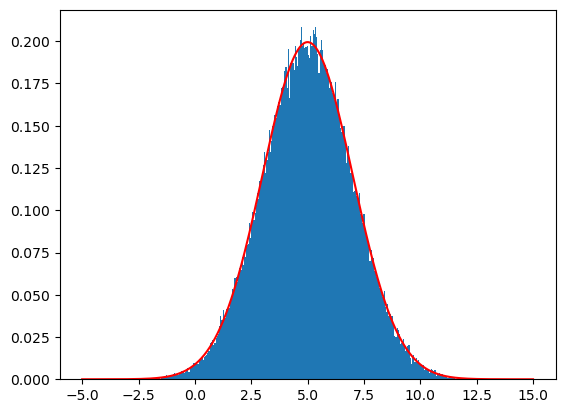

In [78]:
def normal(x, mu=0, sigma=1):
    return 1 / (sigma * np.sqrt(2 * math.pi)) * np.exp(-1 / 2 * ((x - mu) / sigma) ** 2)

mu = 5
sigma = 2

n = 100000

# 1 шаг. Сгенерируем значения из библиотеки и нарисуем синим цветом распределение
Z = np.random.normal(mu, sigma, n)
plt.figure()
plt.hist(Z, density=True, bins=int(n**0.5))
# задаем диапазон значений X от -10, 10.
# И с помощью формулы определяем значение плотности вероятности в каждой точки
X = np.linspace(-5, 15, num=500)
Y = [normal(x, mu, sigma) for x in X]
plt.plot(X, Y, color="r")

## Преобразования распределений
Посмотрим, как меняются распределния, если мы будем вычитать из выборки фиксированное значение или умножать выборку на финсированное значение.

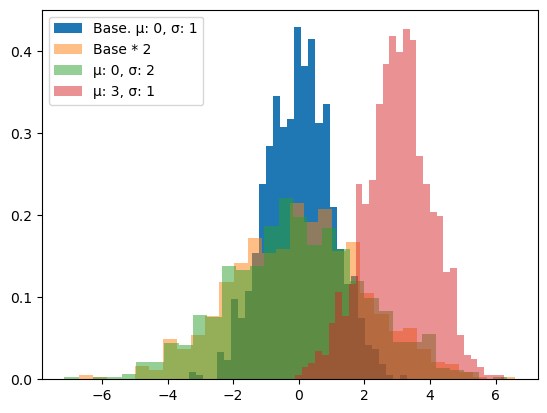

In [58]:
n = 1000
X = np.random.normal(0, 1, n)

plt.figure()
plt.hist(X, density=True, bins=int(np.sqrt(n)), label="Base. μ: 0, σ: 1")

Y = X * 2  # Расширяем данные
plt.hist(Y, density=True, bins=int(np.sqrt(n)), alpha=0.5, label="Base * 2")

Z = np.random.normal(0, 2, n)  # Меняем отклонение
plt.hist(Z, density=True, bins=int(np.sqrt(n)), alpha=0.5, label="μ: 0, σ: 2")


Q = np.random.normal(3, 1, n)  # Меняем отклонение
plt.hist(Q, density=True, bins=int(np.sqrt(n)), alpha=0.5, label="μ: 3, σ: 1")

plt.legend()

## Центральная предельная теорема

https://ru.wikipedia.org/wiki/%D0%A6%D0%B5%D0%BD%D1%82%D1%80%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%82%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0

https://seeing-theory.brown.edu/probability-distributions/index.html

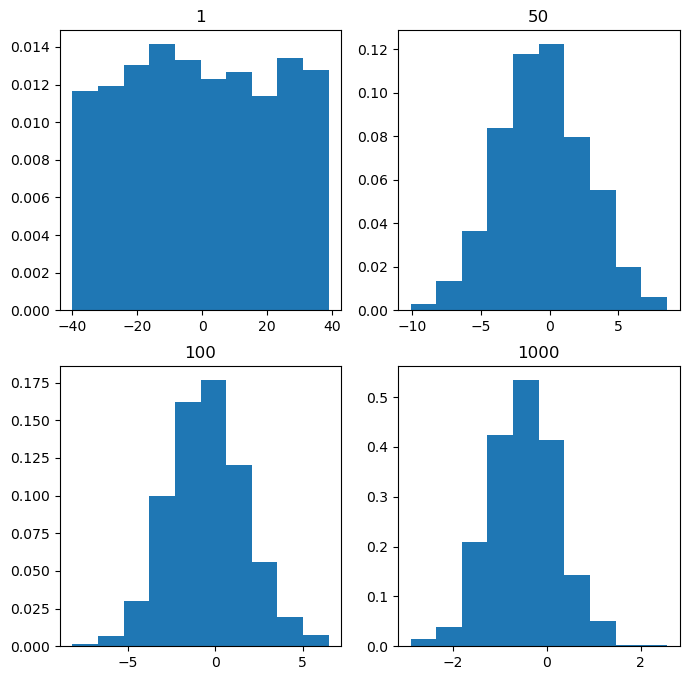

In [48]:
# number of sample
num = [1, 50, 100, 1000]
# list of sample means
means = []

# Generating 1, 10, 30, 100 random numbers from -40 to 40
# taking their mean and appending it to list means.
for j in num:
    # Generating seed so that we can get same result
    # every time the loop is run...
    numpy.random.seed(42)
    x = [numpy.mean(numpy.random.randint(-40, 40, j)) for _i in range(1000)]
    means.append(x)

k = 0

# plotting all the means in one figure
fig, ax = plt.subplots(2, 2, figsize =(8, 8))
for i in range(0, 2):
    for j in range(0, 2):
        # Histogram for each x stored in means
        ax[i, j].hist(means[k], 10, density = True)
        ax[i, j].set_title(label = num[k])
        k = k + 1
plt.show()

## Экспоненциальное распределение
Параметр: $\lambda$ - интенсивность посетителей в единицу времени
$$
p(x, \lambda) =
 \begin{cases}
   \lambda e^{-\lambda x} \ & x \geq 0\\
   0 & x < 0\\
 \end{cases}
$$

Математическое ожидание $E(\xi) = \frac{1}{\lambda}$

Стандартное отклонение $\sigma(\xi) = \frac{1}{\lambda}$

[Wiki](https://ru.wikipedia.org/wiki/%D0%AD%D0%BA%D1%81%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%86%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5)

[Визуализация](https://homepage.divms.uiowa.edu/~mbognar/applets/exp-like.html)

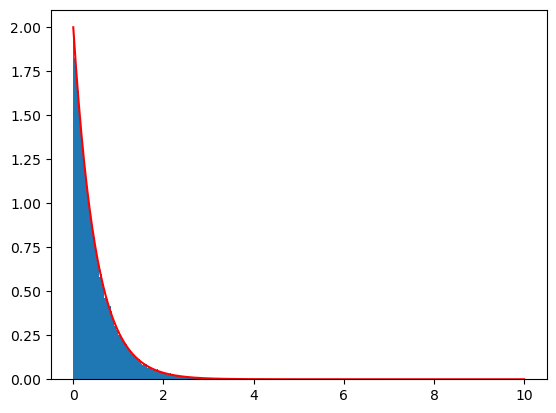

In [75]:
def exponential(x, lambd):
    return lambd * math.exp(-lambd * x)
lambd = 2
n = 100000

Z = np.random.exponential(1 / lambd, n)
plt.figure()
plt.hist(Z, density=True, bins=int(n**0.5))

X = np.linspace(0, 10, num=500)
Y = [exponential(x, lambd) for x in X]
plt.plot(X, Y, color="r")

# Boxplot и квантили

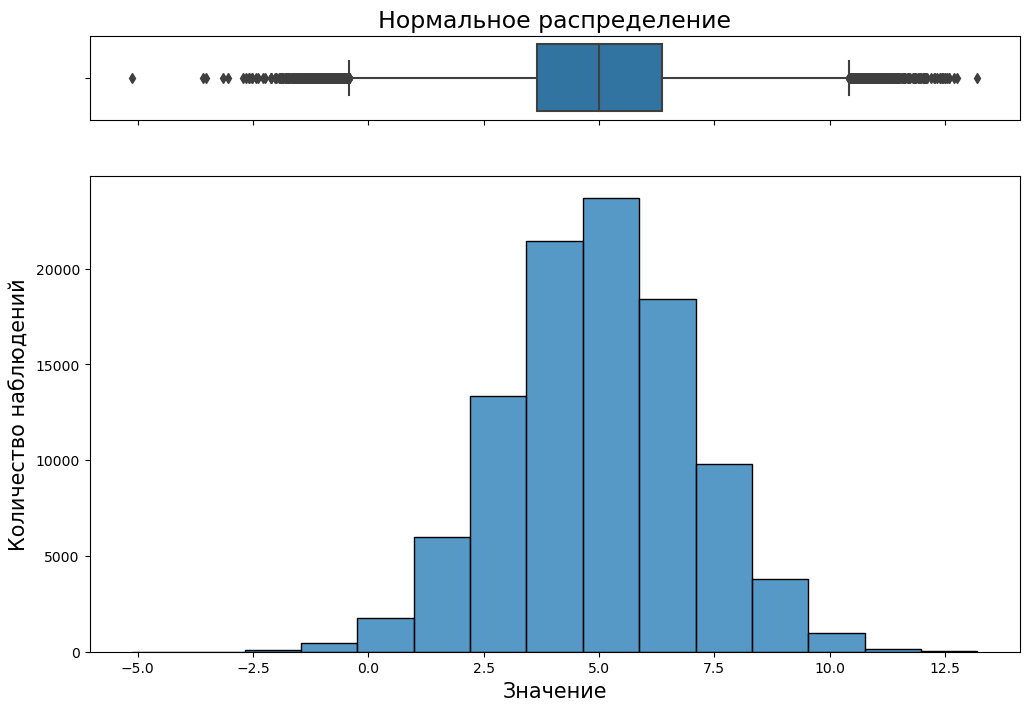

In [80]:
# создадим два подграфика
f, (ax_box, ax_hist) = plt.subplots(nrows = 2, # из двух строк
                                    ncols = 1, # и одного столбца
                                    sharex = True, # оставим только нижние подписи к оси x
                                    gridspec_kw = {'height_ratios': (.15, .85)}, # зададим разную высоту строк
                                    figsize = (12,8)) # зададим размер графика

# X, Y
Z = np.random.normal(mu, sigma, n)
# в первом подграфике построим boxplot
sns.boxplot(x = Z, ax = ax_box)
# во втором гистограмму
sns.histplot(data = Z, bins = 15, ax = ax_hist)

# зададим заголовок и подписи к осям
ax_box.set_title('Нормальное распределение', fontsize = 17)
ax_hist.set_xlabel('Значение', fontsize = 15)
ax_hist.set_ylabel('Количество наблюдений', fontsize = 15)

plt.show()